State Keys: odict_keys(['position', 'velocity'])


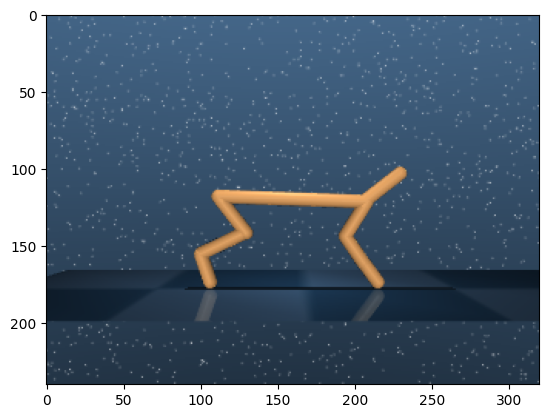

In [3]:
from dm_control import suite
import numpy as np
import matplotlib.pyplot as plt

# Load the environment
# 'cheetah' is the domain, 'run' is the task
env = suite.load(domain_name="cheetah", task_name="run")

# Reset the environment
time_step = env.reset()

# Inspect the observation (Default is State Vector, NOT Pixels)
print("State Keys:", time_step.observation.keys())
# Output: dict_keys(['position', 'velocity'])

# Step through the environment
action_spec = env.action_spec()
action = np.random.uniform(
    action_spec.minimum, action_spec.maximum, size=action_spec.shape
)

time_step = env.step(action)

# Render a frame (CRITICAL for your Visual World Model)
# camera_id=0 is usually the tracking camera
pixels = env.physics.render(height=240, width=320, camera_id=0)

plt.imshow(pixels)
plt.show()

In [2]:
import gymnasium as gym

# Shimmy automatically registers dm_control environments with this prefix
# Syntax: dm_control/{domain}-{task}-v0
env = gym.make("dm_control/cheetah-run-v0", render_mode="rgb_array")

obs, info = env.reset()

# Now 'obs' is a standard dictionary (if state-based)
# OR pixels if you use the wrapper below.
print(obs.keys())

dict_keys(['position', 'velocity'])


In [2]:
import gymnasium as gym
from gymnasium.wrappers import (
    FrameStackObservation,
    AddRenderObservation,
    ResizeObservation,
)
import numpy as np
import matplotlib.pyplot as plt
from dm_control import suite
import shimmy

from gymnasium.envs.registration import registry

dm_control_env_ids = [
    env_id for env_id in registry if env_id.startswith("dm_control/")
]
print("Available dm_control environments:")
for env_id in dm_control_env_ids:
    print(env_id)
print(f"Total dm_control environments found: {len(dm_control_env_ids)}")

Available dm_control environments:
dm_control/compatibility-env-v0
dm_control/acrobot-swingup-v0
dm_control/acrobot-swingup_sparse-v0
dm_control/ball_in_cup-catch-v0
dm_control/cartpole-balance-v0
dm_control/cartpole-balance_sparse-v0
dm_control/cartpole-swingup-v0
dm_control/cartpole-swingup_sparse-v0
dm_control/cartpole-two_poles-v0
dm_control/cartpole-three_poles-v0
dm_control/cheetah-run-v0
dm_control/dog-stand-v0
dm_control/dog-walk-v0
dm_control/dog-trot-v0
dm_control/dog-run-v0
dm_control/dog-fetch-v0
dm_control/finger-spin-v0
dm_control/finger-turn_easy-v0
dm_control/finger-turn_hard-v0
dm_control/fish-upright-v0
dm_control/fish-swim-v0
dm_control/hopper-stand-v0
dm_control/hopper-hop-v0
dm_control/humanoid-stand-v0
dm_control/humanoid-walk-v0
dm_control/humanoid-run-v0
dm_control/humanoid-run_pure_state-v0
dm_control/humanoid_CMU-stand-v0
dm_control/humanoid_CMU-walk-v0
dm_control/humanoid_CMU-run-v0
dm_control/lqr-lqr_2_1-v0
dm_control/lqr-lqr_6_2-v0
dm_control/manipulator-br

objc[64879]: Class SDLApplication is implemented in both /Users/eli/anaconda3/envs/physics_wm/lib/python3.10/site-packages/cv2/.dylibs/libSDL2-2.0.0.dylib (0x301e50890) and /Users/eli/anaconda3/envs/physics_wm/lib/python3.10/site-packages/pygame/.dylibs/libSDL2-2.0.0.dylib (0x323eed2c8). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[64879]: Class SDLAppDelegate is implemented in both /Users/eli/anaconda3/envs/physics_wm/lib/python3.10/site-packages/cv2/.dylibs/libSDL2-2.0.0.dylib (0x301e508e0) and /Users/eli/anaconda3/envs/physics_wm/lib/python3.10/site-packages/pygame/.dylibs/libSDL2-2.0.0.dylib (0x323eed318). This may cause spurious casting failures and mysterious crashes. One of the duplicates must be removed or renamed.
objc[64879]: Class SDLTranslatorResponder is implemented in both /Users/eli/anaconda3/envs/physics_wm/lib/python3.10/site-packages/cv2/.dylibs/libSDL2-2.0.0.dylib (0x301e50958) and /Users/eli/

In [14]:
import numpy as np


def stack_obs(obs, frame_stack=3, image_size=84):
    obs = np.concatenate(obs, axis=-1).reshape(
        3 * frame_stack, image_size, image_size
    )
    return obs


gym_env = AddRenderObservation(
    gym.make("dm_control/cheetah-run-v0", render_mode="rgb_array")
)
# gym_env = ResizeObservation(gym_env, (84, 84))  # Resize to 84x84x3 pixels
# num_frames_to_stack = 3
# stacked_env = FrameStackObservation(gym_env, stack_size=num_frames_to_stack)
# # # The observation shape = (3, 84, 84, 3)
# obs, info = stacked_env.reset()
# obs = stack_obs(obs, num_frames_to_stack)  # obs.shape = (9, 84, 84)
# action = stacked_env.action_space.sample()
# next_obs, reward, done, _, info = stacked_env.step(action)
# next_obs = stack_obs(next_obs)  # next_obs.shape = (9, 84, 84)
# # obs = next_obs

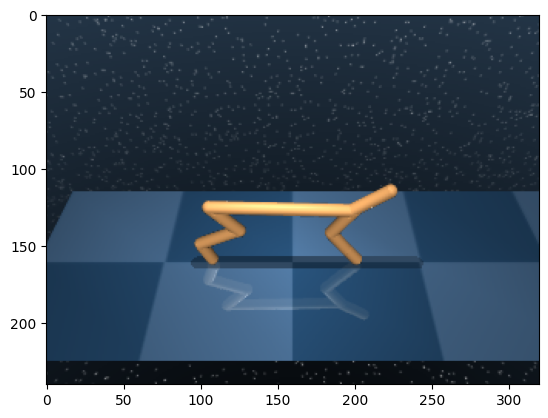

In [15]:
# plot obs
obs, info = gym_env.reset()
plt.imshow(obs)
plt.show()

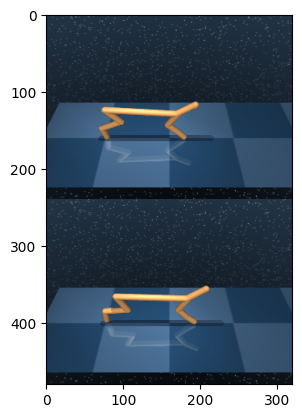

In [24]:
frames = []
for i in range(1000):
    action = gym_env.action_space.sample() + np.array(
        [0.5, 0.0, 0.0, 0.0, 0.0, 0.0]
    )
    obs, reward, done, _, info = gym_env.step(action)
    frames.append(obs)

# plot frames
np_frames = np.concatenate([frames[0], frames[-1]], axis=0)
plt.imshow(np_frames)
plt.show()

In [25]:
info

{'timestep.discount': 1.0, 'timestep.step_type': <StepType.MID: 1>}

In [3]:
pen_env = gym.make("dm_control/pendulum-swingup-v0", render_mode="rgb_array")
pen_env = AddRenderObservation(pen_env)
obs, info = pen_env.reset()

In [30]:
obs.shape

(240, 320, 3)

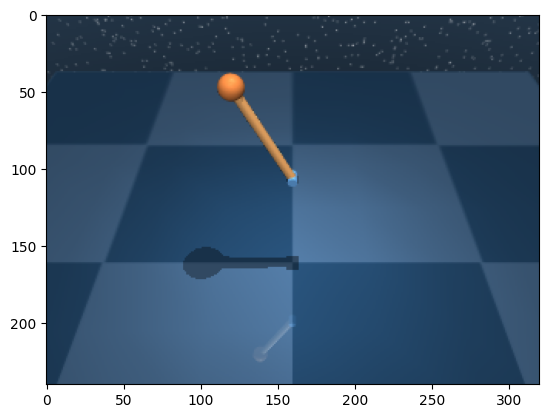

In [31]:
plt.imshow(obs)
plt.show()

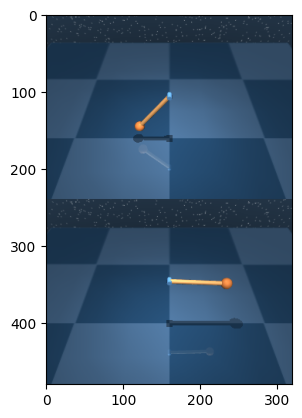

In [40]:
frames = []
for i in range(1000):
    action = pen_env.action_space.sample()
    obs, reward, done, _, info = pen_env.step(action)
    frames.append(obs)

np_frames = np.concatenate([frames[0], frames[-1]], axis=0)
plt.imshow(np_frames)
plt.show()

In [38]:
info

{'timestep.discount': 1.0, 'timestep.step_type': <StepType.MID: 1>}

In [41]:
from stable_baselines3 import PPO

ModuleNotFoundError: No module named 'stable_baselines3'

In [8]:
import gymnasium as gym
import minari
from minari import DataCollector
from stable_baselines3 import PPO

# 1. Create the environment using Shimmy
# Note: render_mode="rgb_array" is critical for World Models
env = gym.make("CartPole-v1", render_mode="rgb_array")

# 2. Wrap it with Minari's DataCollector
# record_infos=True captures rewards and other stats
# env = DataCollector(
#     env,
#     step_data_callback=minari.StepDataCallback(
#         observation_space=env.observation_space, action_space=env.action_space
#     ),
# )

# 3. Train PPO (Fast "Expert" Data)
# We use SB3 here for simplicity. 100k steps is usually enough to get movement.
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=1000)  # 00_000)

# 4. Save the Dataset
# # This creates a local file (e.g., ~/.minari/datasets/...)
# dataset_id = "dm_control_cheetah-medium-v0"
# env.create_dataset(
#     dataset_id=dataset_id,
#     algorithm_name="PPO",
#     code_permalink="https://github.com/your-repo",
# )

# print(f"Dataset {dataset_id} created with {env.total_steps} steps.")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.4     |
|    ep_rew_mean     | 25.4     |
| time/              |          |
|    fps             | 6875     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
